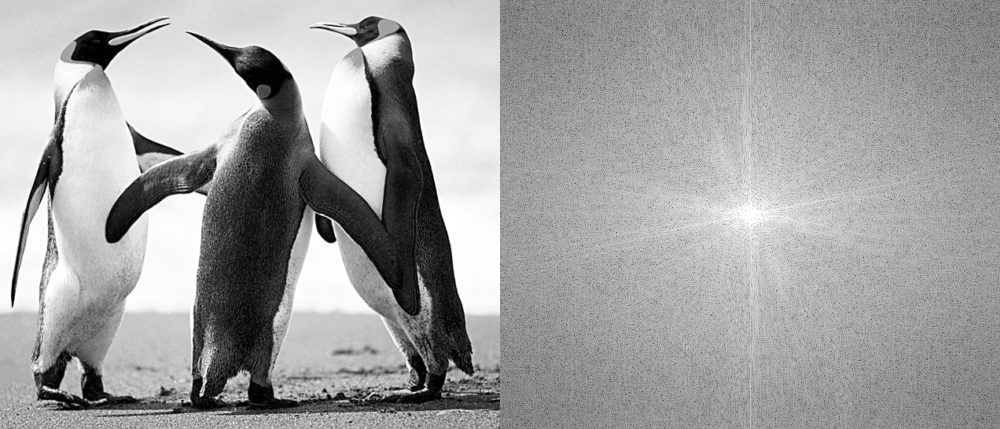

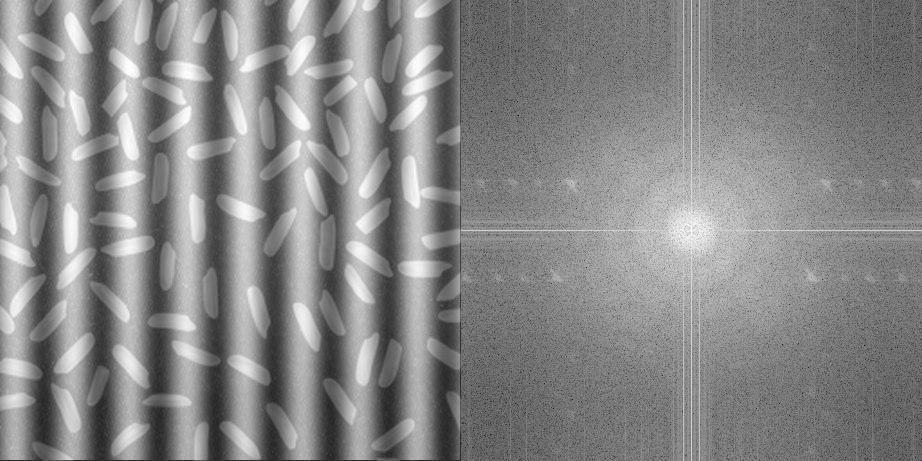

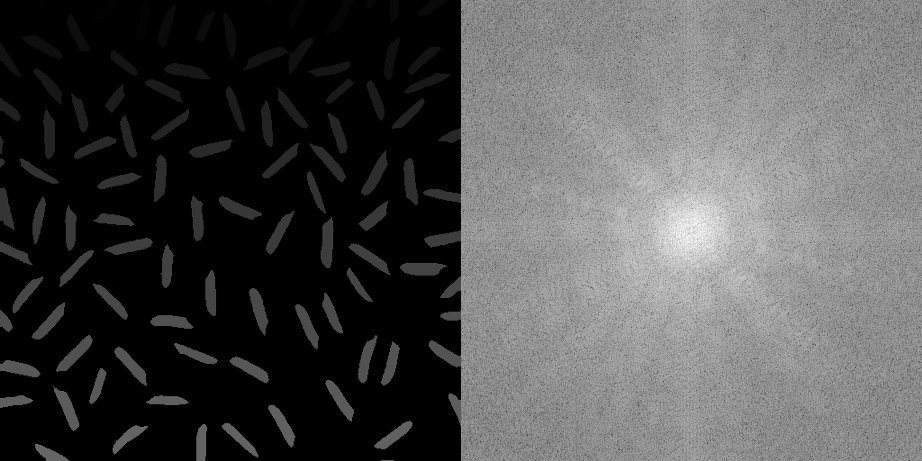

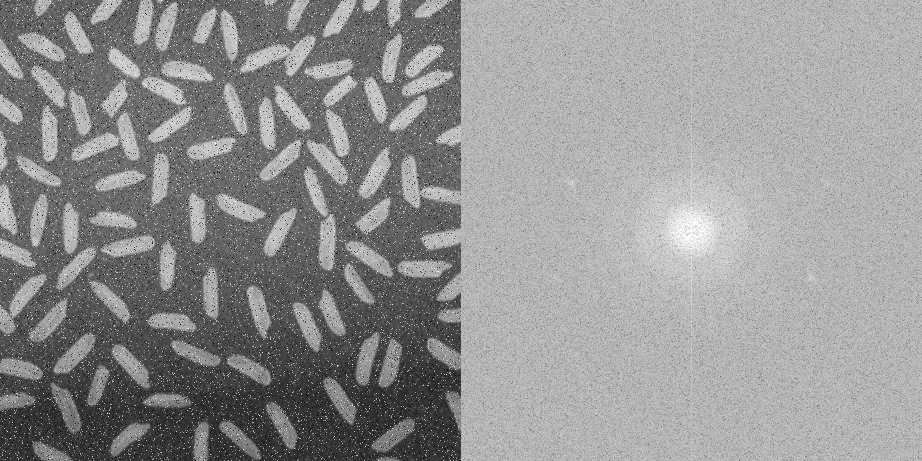

In [3]:
#importation des bibliothèques pour le traitement
import cv2
import numpy as  np
import glob
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# On crée un tableau  pour l'enregistrement des spectres
spectres = []
#lecture des images depuis le disque
list_images = glob.iglob("images/*")

#création d'une boucle pour parcourir la liste d'images et appliquer la dft sur chacune d'elle
for image_title in list_images:
    #lecture de l'image en niveau de gris
    img = cv2.imread(image_title, cv2.IMREAD_GRAYSCALE)
    #conversion de entier en float(réel)
    img_float32 = np.float32(img)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage des éléments du spectre obtenu des extrémités vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    #permet de réhausser le spectre pour le rendre plus visible
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    #Concaténation de l'image d'origine et du spectre pour faciliter l'affichage
    img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)
    #Affichage de l'image d'origine et son spectre
    cv2_imshow( img_and_magnitude)


    # Ceci permet d'ajouter chaque transformée de Fourier dans un tableau nommé spectre
    spectres.append(dft_shift)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

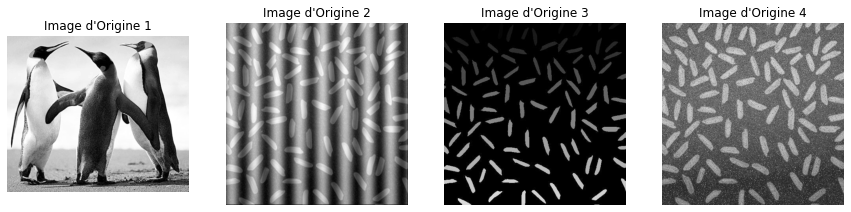

In [4]:
#Transformée inverse
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
count = 1
for name in spectres:
    fig.add_subplot(4, 4, count) 
    # Permet de remettre aux extrémités du spectre les éléments renvoyés au centre pendant la dft 
    img_idf = np.fft.ifftshift(name)
    # Détermine la transformée de fourier inverse de l'image avec comme sortir un nombre complexe
    img_idf = cv2.idft(img_idf) 
    # combiner les composants complex en image originale
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image d'origine après idft
    plt.imshow(img_idf, cmap='gray')
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("Image d'Origine "+str(count))
    count = count +1
    
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


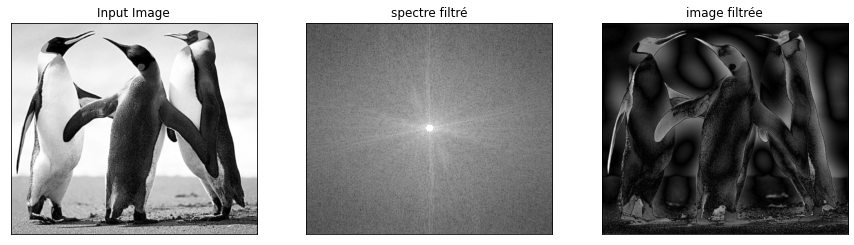

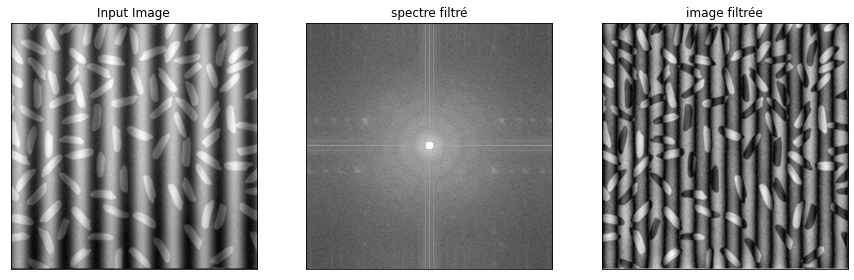

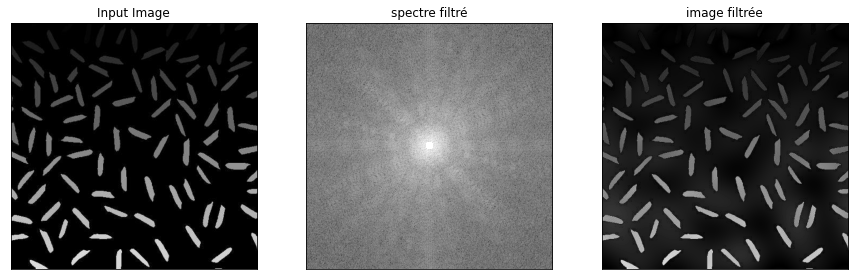

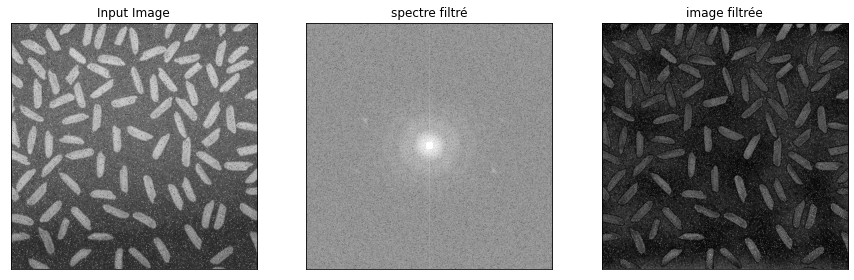

In [22]:
#Utilisation du filtre passe haut sur les parties réelles et imaginaires 

img = cv2.imread('images/image1.jpg',0) #lecture de l'image d'origine

#creation d'un tableau pour l'enregistrement des spectres
spectres = []
#lecture des images 
list_images = glob.iglob("images/*")

for img in list_images:
    #lecture des images en niveau de gris
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #conversion de entier en float(réel)
    img_float32 = np.float32(img) 

    #la ligne suivante permet de calculer la transformée de fourier avec la fonction dft
    #dft=discret fourrier transform
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) #permet donc d'obtenir une valeur complex

    #la ligne suivante permet de faire une inversion des cadrants
    #ramener les basses fréquences vers le centre et hautes fréquences aux extrémités
    dft_shift = np.fft.fftshift(dft)


    # Definition du masque filtre pass haut
    rows, cols = img.shape #on définie la forme de l'image en lignes et colonnes
    crow, ccol = int(rows/2), int(cols/2) #on définie le centre des lignes et le centre des colonnes

    #Création du masque avec deux canaux, car on a imaginaire et réel
    mask = np.ones((rows, cols, 2), np.uint8)

    #on choisie un masque sous forme de cercle de taille variable par le rayon du cercle
    r = 5
    #le centre de notre masque a pour coordonnées le centre des lignes en absice et centre des colonnes en ordonnées
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]

    #definition de la surface du masque
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r

    #on donne la valeur null pour toutes les fréquences proches du centre
    mask[mask_area] = 0

    #on applique le masque sur le spectre après transformée de fourier
    fshift = dft_shift * mask
    #permet de calculer la norme et de réhausser le spectre après filtrage
    magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

    fshift_mask_mag = cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])

    

    #On remet les cadrants à l'état initial, du centre vers les extrémités aux extrémités
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift) #application de la transformé inverse de fourier
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    fig = plt.figure(figsize=(15, 20))

    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('spectre filtré'), plt.xticks([]), plt.yticks([])

    plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
    plt.title('image filtrée'), plt.xticks([]), plt.yticks([])

    plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


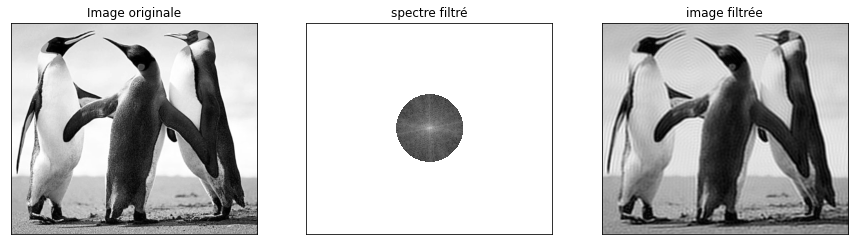

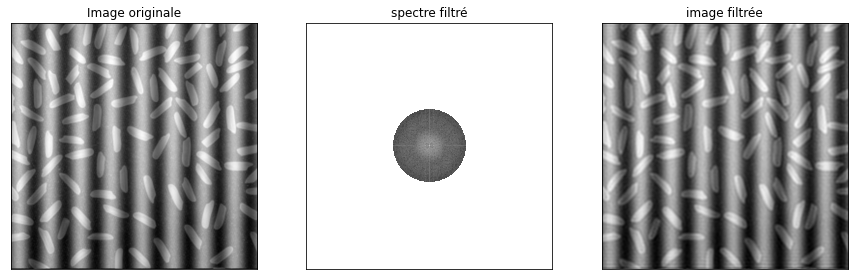

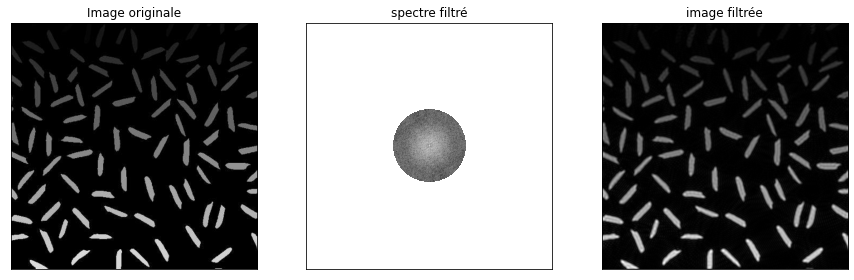

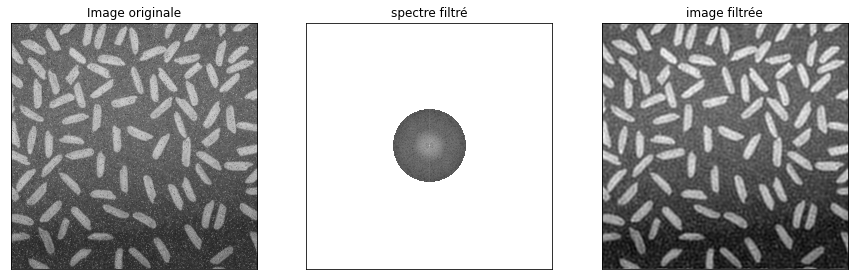

In [16]:
#Utilisation du filtre passe bas sur les parties réelles et imaginaires 

#creation d'un tableau pour l'enregistrement des spectres dans le but de de faire l'inverse
spectres = []
#lecture des images depuis le disque
list_images = glob.iglob("images/*")

for img in list_images:
 
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

    img_float32 = np.float32(img) #conversion de entier en float(réel)

    #la ligne suivante permet de calculer la transformée de fourier avec la fonction dft
    #dft=discret fourrier transform
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) #permet donc d'obtenir une valeur complex

    #la ligne suivante permet de faire une inversion des cadrants
    #ramener les basses fréquances vers le centre et hautes fréquences aux extrémités
    dft_shift = np.fft.fftshift(dft)

     

    # Definition du masque filtre pass haut
    rows, cols = img.shape #on définie la forme de l'image en lignes et colonnes
    crow, ccol = int(rows/2), int(cols/2) #on définie le centre des lignes et le centre des colonnes

    #Création du masque avec deux canaux, car on a imaginaire et réel
    mask = np.zeros((rows, cols, 2), np.uint8)

    #on choisie un masque sous forme de cercle de taille variable sur le rayon 
    r = 70
    #le centre de notre masque a pour coordonnées le centre des lignes en absice et centre des colonnes en ordonnées
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]

    #definition de la surface du masque
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r

    #on donne la valeur 1 pour toutes les fréquences proches du centre
    mask[mask_area] = 1

    #on applique le masque sur le spectre de l'image obtenu après le dft
    fshift = dft_shift * mask
    #permet de calculer la norme et de réhausser le spectre après filtrage
    magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

    fshift_mask_mag = cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])


    #On remet les cadrants à l'état initial, du centre vers les  extrémités
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift) #application de la transformé inverse de fourier
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    fig = plt.figure(figsize=(15, 20))

    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.title('Image originale'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('spectre filtré'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
    plt.title('image filtrée'), plt.xticks([]), plt.yticks([])
    
    plt.show()

